In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
sns.set_style("white")
plt.rc('font', size=12)

In [2]:
def create_pie_plot(fig, gs, x_value, y_value, column, df_data, palette_values):
    ax_data = fig.add_subplot(gs[x_value, y_value])
    #ax_data.set_title(column)
    count_column = df_data[column].value_counts()
    labels = count_column.index.tolist()
    counts = count_column.values.tolist()
    colors = sns.color_palette(palette_values)[0:len(counts)+1]

    ax_data.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')

In [3]:
df_data = pd.read_csv("../processed_data/1_processed_data.csv")
df_data.head()

,Name,ID,Attachment,ITERS range,Gender,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Sensitivity,Cis total mean,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
0,Maximiliano-Cárdenas-Catelicán,1,Insecure,Average Quality,Male,20.076728,31.719207,23.453752,25.016903,2,3.884615,21.765240,28.368055,6.602815
1,Martín-Pérez-González,4,Secure,Average Quality,Male,28.584920,82.400761,28.361209,19.363161,3,3.807692,28.473065,50.881961,22.408896
2,Noemí-Cárdenas-Gutierrez,5,Secure,Average Quality,Female,161.424693,46.867951,39.006348,52.728307,5,3.807692,100.215520,49.798129,-50.417391
3,Jasna-Mansilla-Mansilla,7,Insecure,Average Quality,Female,26.747838,47.213491,21.599136,35.942378,1,3.846154,24.173487,41.577934,17.404447
4,Jhampiere-Largacha-Yañez,11,NaN,Average Quality,Male,118.901337,47.213491,37.125222,382.715268,5,3.961538,78.013279,214.964380,136.951100


In [4]:
df_data["Gender"] = df_data["Gender"].replace(
    {"Female": "Girl",
     "Male": "Boy"}
)

In [5]:
df_data["Attachment"] = df_data["Attachment"].replace(
    {"Secure": "Secure (SA)",
     "Insecure" : "Insecure (IA)"}
)

In [6]:
df_data["ITERS range"] = df_data["ITERS range"].replace({
   "Average Quality" : "Mean Quality"
})

In [7]:
df_data["ITERS range"].value_counts()

ITERS range
Mean Quality    27
Low Quality      8
Name: count, dtype: int64

In [8]:
df_data["Attachment"].value_counts()

Attachment
Secure (SA)      18
Insecure (IA)     9
Name: count, dtype: int64

In [9]:
df_data["Gender"].value_counts()

Gender
Girl    20
Boy     15
Name: count, dtype: int64

In [10]:
df1 = df_data.groupby(by=["Attachment", "ITERS range"]).count()*100/len(df_data)
df1 = df1.round(decimals=2)

matrix_data = []

for index in df1.index:
    row = [f"{index[0]}-{index[1]}", index[0], index[1], df1["Name"][index]]
    matrix_data.append(row)
df_attachmen_itters = pd.DataFrame(data=matrix_data, columns=["Group", "Attachment", "ITERS range", "Frequency"])
df_attachmen_itters

,Group,Attachment,ITERS range,Frequency
0,Insecure (IA)-Low Quality,Insecure (IA),Low Quality,5.71
1,Insecure (IA)-Mean Quality,Insecure (IA),Mean Quality,20.00
2,Secure (SA)-Low Quality,Secure (SA),Low Quality,11.43
3,Secure (SA)-Mean Quality,Secure (SA),Mean Quality,40.00


In [11]:
df2 = df_data.groupby(by=["Attachment", "Gender"]).count()*100/len(df_data)
df2 = df2.round(decimals=2)

matrix_data = []

for index in df2.index:
    row = [f"{index[0]}-{index[1]}", index[0], index[1], df2["Name"][index]]
    matrix_data.append(row)
df_attachmen_gender = pd.DataFrame(data=matrix_data, columns=["Group", "Attachment", "Gender", "Frequency"])
df_attachmen_gender

,Group,Attachment,Gender,Frequency
0,Insecure (IA)-Boy,Insecure (IA),Boy,14.29
1,Insecure (IA)-Girl,Insecure (IA),Girl,11.43
2,Secure (SA)-Boy,Secure (SA),Boy,17.14
3,Secure (SA)-Girl,Secure (SA),Girl,34.29


In [12]:
df3 = df_data.groupby(by=["ITERS range", "Gender"]).count()*100/len(df_data)
df3 = df3.round(decimals=2)

matrix_data = []

for index in df3.index:
    row = [f"{index[0]}-{index[1]}", index[0], index[1], df3["Name"][index]]
    matrix_data.append(row)
df_iters_gender = pd.DataFrame(data=matrix_data, columns=["Group", "ITERS range", "Gender", "Frequency"])
df_iters_gender

,Group,ITERS range,Gender,Frequency
0,Low Quality-Boy,Low Quality,Boy,5.71
1,Low Quality-Girl,Low Quality,Girl,17.14
2,Mean Quality-Boy,Mean Quality,Boy,37.14
3,Mean Quality-Girl,Mean Quality,Girl,40.00


In [13]:
df_data.groupby(by=["ITERS range", "Gender", "Attachment"]).count()

Name  ID  IgA D1-Morning  IgA D1-Afternoon  \
ITERS range  Gender Attachment                                                  
Low Quality  Boy    Insecure (IA)     1   1               1                 1   
                    Secure (SA)       1   1               1                 1   
             Girl   Insecure (IA)     1   1               1                 1   
                    Secure (SA)       3   3               3                 3   
Mean Quality Boy    Insecure (IA)     4   4               4                 4   
                    Secure (SA)       5   5               5                 5   
             Girl   Insecure (IA)     3   3               3                 3   
                    Secure (SA)       9   9               9                 9   

                                   IgA D2-Morning  IgA D2-Afternoon  \
ITERS range  Gender Attachment                                        
Low Quality  Boy    Insecure (IA)               1                 1   
                    Secure (SA)                 1                 1   
             Girl   Insecure (IA)               1                 1   
                    Secure (SA)                 3                 3   
Mean Quality Boy    Insecure (IA)               4                 4   
                    Secure (SA)                 5                 5   
             Girl   Insecure (IA)               3                 3   
                    Secure (SA)                 9                 9   

                                   Sensitivity  Cis total mean  \
ITERS range  Gender Attachment                                   
Low Quality  Boy    Insecure (IA)            1               1   
                    Secure (SA)              1               1   
             Girl   Insecure (IA)            1               1   
                    Secure (SA)              3               3   
Mean Quality Boy    Insecure (IA)            4               4   
                    Secure (SA)              5               5   
             Girl   Insecure (IA)            3               3   
                    Secure (SA)              9               9   

                                   Average IgA Morning  Average IgA Afternoon  \
ITERS range  Gender Attachment                                                  
Low Quality  Boy    Insecure (IA)                    1                      1   
                    Secure (SA)                      1                      1   
             Girl   Insecure (IA)                    1                      1   
                    Secure (SA)                      3                      3   
Mean Quality Boy    Insecure (IA)                    4                      4   
                    Secure (SA)                      5                      5   
             Girl   Insecure (IA)                    3                      3   
                    Secure (SA)                      9                      9   

                                   Average Difference IgA  
ITERS range  Gender Attachment                             
Low Quality  Boy    Insecure (IA)                       1  
                    Secure (SA)                         1  
             Girl   Insecure (IA)                       1  
                    Secure (SA)                         3  
Mean Quality Boy    Insecure (IA)                       4  
                    Secure (SA)                         5  
             Girl   Insecure (IA)                       3  
                    Secure (SA)                         9

In [21]:
palette_values = ['#026E81', '#00ABBD', '#0099DD', '#FF9933', '#A1C7E0']

colors = sns.color_palette(palette_values)
colors

[(0.00784313725490196, 0.43137254901960786, 0.5058823529411764),
 (0.0, 0.6705882352941176, 0.7411764705882353),
 (0.0, 0.6, 0.8666666666666667),
 (1.0, 0.6, 0.2),
 (0.6313725490196078, 0.7803921568627451, 0.8784313725490196)]

In [14]:
palette_values_to_use = ['#F288B9', '#8091F2', '#2CBFB1', '#F2DEA2']

colors = sns.color_palette(palette_values_to_use)
colors

[(0.9490196078431372, 0.5333333333333333, 0.7254901960784313),
 (0.5019607843137255, 0.5686274509803921, 0.9490196078431372),
 (0.17254901960784313, 0.7490196078431373, 0.6941176470588235),
 (0.9490196078431372, 0.8705882352941177, 0.6352941176470588)]

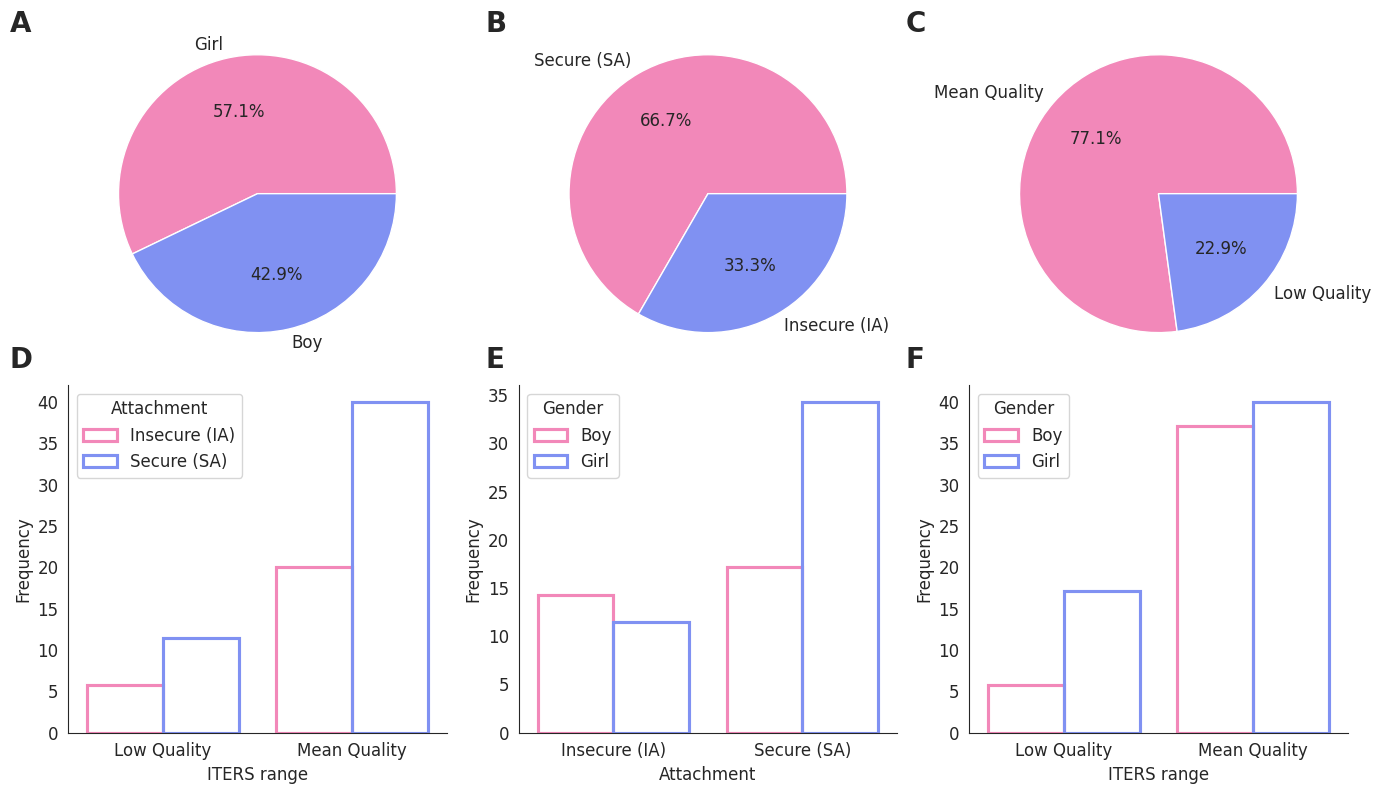

In [ ]:
palette_values = ['#026E81', '#00ABBD', '#0099DD', '#FF9933', '#A1C7E0']
palette_values = ['#F288B9', '#F2D5E3', '#8091F2', '#2CBFB1', '#F2DEA2']

colors = sns.color_palette(palette_values[2:])

fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 3, figure=fig)

index=0
x_value = 0
y_value = 0

for column in ['Gender', "Attachment", 'ITERS range']:

    create_pie_plot(fig, gs, x_value, y_value, column, df_data, palette_values_to_use)
    y_value+=1

ax_data = fig.add_subplot(gs[1, 1])
sns.barplot(ax=ax_data, data=df_attachmen_gender, x="Attachment", y="Frequency", hue="Gender", fill=False, palette=colors)

ax_data = fig.add_subplot(gs[1, 0])
sns.barplot(ax=ax_data, data=df_attachmen_itters, hue="Attachment", y="Frequency", x="ITERS range", fill=False, palette=colors)

ax_data = fig.add_subplot(gs[1, 2])
sns.barplot(ax=ax_data, data=df_iters_gender, hue="Gender", y="Frequency", x="ITERS range", fill=False, palette=colors)

sns.despine()
fig.text(0.01, 0.99, "A", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.35, 0.99, "B", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.65, 0.99, "C", ha='left', va='top', fontsize=20, fontweight='bold')

fig.text(0.01, 0.57, "D", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.35, 0.57, "E", ha='left', va='top', fontsize=20, fontweight='bold')
fig.text(0.65, 0.57, "F", ha='left', va='top', fontsize=20, fontweight='bold')

plt.tight_layout()
